In [1]:
#Lander Borbe

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import cv2
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from keras.backend import categorical_crossentropy
from tensorflow.keras.preprocessing import image

In [2]:
train = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

train_path = 'C:/Users/lborb/3D Objects/CNN Practice/train'
train_dataset = train.flow_from_directory(train_path, 
                                          target_size = (224, 224), 
                                          batch_size = 32, 
                                          class_mode = 'categorical')

Found 249 images belonging to 3 classes.


In [3]:
test = ImageDataGenerator(rescale=1./255)
test_path = 'C:/Users/lborb/3D Objects/CNN Practice/test'
test_dataset = train.flow_from_directory(test_path, 
                                         target_size = (224, 224), 
                                         batch_size = 32, 
                                         class_mode = 'categorical')

Found 65 images belonging to 3 classes.


In [4]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [5]:
test_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [6]:
model = Sequential()
model.add(Conv2D(32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [9]:
epoch_num = 25
history = model.fit_generator(train_dataset,steps_per_epoch=6,epochs = epoch_num,validation_data = test_dataset,validation_steps=2)

C:\Users\lborb\AppData\Local\Temp\ipykernel_13416\2390050338.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_dataset,steps_per_epoch=6,epochs = epoch_num,validation_data = test_dataset,validation_steps=2)


Epoch 1/25
6/6 [==============================] - 86s 14s/step - loss: 2.1979 - accuracy: 0.3542 - val_loss: 1.0984 - val_accuracy: 0.3125
Epoch 2/25
6/6 [==============================] - 88s 15s/step - loss: 1.0884 - accuracy: 0.4162 - val_loss: 1.0790 - val_accuracy: 0.3906
Epoch 3/25
6/6 [==============================] - 96s 16s/step - loss: 1.0231 - accuracy: 0.4811 - val_loss: 1.0556 - val_accuracy: 0.4062
Epoch 4/25
6/6 [==============================] - 88s 15s/step - loss: 0.9273 - accuracy: 0.5784 - val_loss: 0.9391 - val_accuracy: 0.5938
Epoch 5/25
6/6 [==============================] - 86s 14s/step - loss: 0.7835 - accuracy: 0.6432 - val_loss: 0.7908 - val_accuracy: 0.6875
Epoch 6/25
6/6 [==============================] - 90s 15s/step - loss: 0.7766 - accuracy: 0.6146 - val_loss: 0.9190 - val_accuracy: 0.7656
Epoch 7/25
6/6 [==============================] - 88s 15s/step - loss: 0.7327 - accuracy: 0.6324 - val_loss: 0.7547 - val_accuracy: 0.6406
Epoch 8/25
6/6 [===========

In [10]:
score = model.evaluate(train_dataset)

8/8 [==============================] - 35s 4s/step - loss: 0.3747 - accuracy: 0.8554


In [11]:
print('Test score:', score[0])

Test score: 0.3746923804283142


In [12]:
print('Test accuracy:', score[1])

Test accuracy: 0.8554216623306274


In [13]:
path_dir = 'C:/Users/lborb/3D Objects/CNN Practice/'

def loadImages(path, folder):
    data_files = sorted([os.path.join(path, folder, file)
                        for file in os.listdir(path + folder + '/')
                        if (file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png') or file.endswith('.webp'))])
    return data_files

validation_data = loadImages(path_dir, 'validation')

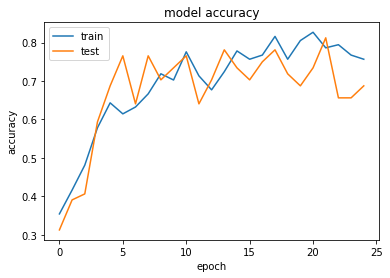

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

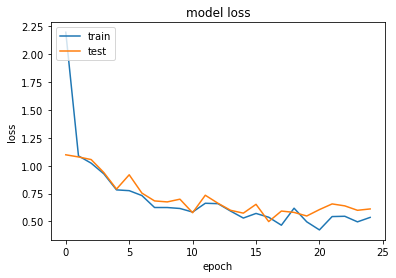

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Pic 10')

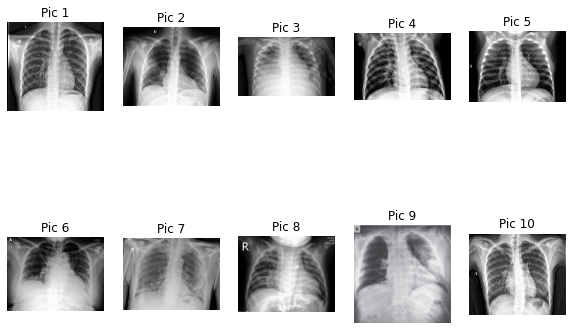

In [16]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 5
test_image1 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic1.JPEG')
test_image2 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic2.JPEG')
test_image3 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic3.JPEG')
test_image4 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic4.JPEG')
test_image5 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic5.JPEG')
test_image6 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic6.JPEG')
test_image7 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic7.JPG')
test_image8 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic8.JPEG')
test_image9 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic9.JPEG')
test_image10 = image.load_img(r'C:/Users/lborb/3D Objects/CNN Practice/validation/pic10.JPEG')

fig.add_subplot(rows, columns, 1)
plt.imshow(test_image1)
plt.axis('off')
plt.title("Pic 1")
  
fig.add_subplot(rows, columns, 2)
plt.imshow(test_image2)
plt.axis('off')
plt.title("Pic 2")
  
fig.add_subplot(rows, columns, 3)
plt.imshow(test_image3)
plt.axis('off')
plt.title("Pic 3")

fig.add_subplot(rows, columns, 4)
plt.imshow(test_image4)
plt.axis('off')
plt.title("Pic 4")

fig.add_subplot(rows, columns, 5)
plt.imshow(test_image5)
plt.axis('off')
plt.title("Pic 5")

fig.add_subplot(rows, columns, 6)
plt.imshow(test_image6)
plt.axis('off')
plt.title("Pic 6")

fig.add_subplot(rows, columns, 7)
plt.imshow(test_image7)
plt.axis('off')
plt.title("Pic 7")

fig.add_subplot(rows, columns, 8)
plt.imshow(test_image8)
plt.axis('off')
plt.title("Pic 8")

fig.add_subplot(rows, columns, 9)
plt.imshow(test_image9)
plt.axis('off')
plt.title("Pic 9")

fig.add_subplot(rows, columns, 10)
plt.imshow(test_image10)
plt.axis('off')
plt.title("Pic 10")

In [17]:
x_cv = validation_data
x_out = []
images = []

for x in x_cv:
    img = cv2.imread(x)
    img = img[:, :, :3]
    images.append(img)

    width = 224
    height = 224
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    x_out.append(resized)

x_out = np.array(x_out)
x_out = x_out/255

In [18]:
print('Test accuracy:', score[1])

Test accuracy: 0.8554216623306274


In [19]:
y_prediction = model.predict(x_out)
predict = np.argmax(y_prediction, axis=1)
print(predict)

1/1 [==============================] - 1s 1s/step
[0 1 0 2 2 2 0 0 2 0]


In [20]:
# 0 - covid
# 1 - normal
# 2 - viral pneumonia